<a href="https://colab.research.google.com/github/K-Kilel/WEEK-4-CORE-IP/blob/main/Kelvin_Kilel_Moringa_School_Core_Week_4_Independent_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autolib Car Company**

**Research Question**

###### The research problem is to figure out if the number of bluecars returned on the weekend is equal or not eqaual to the number of recharging slots freed on the weekend.

**Metrics for Success**

Identify some areas and periods of interest via sampling.

Perform hypothesis testing with regards to the claim that we will have made. 

**Understanding the context**

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

**Recording the Experimental Design**

Find and deal with outliers, anomalies, and missing data within the dataset.

Perform univariate, bivariate and multivariate analysis recording your observations.

Implement the solution by performing the hypothesis testing.

This will then be documented in a data report.

**Data Relevance**

The main dataset contains information on the three types of cars owned by Autolib that are Bluecars, Utilib and Utilib 1.4. It also has information on the usage on different location and the recharge slots. All this information is for the period of 2018.

#### **Importing Libraries**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind

#### **Loading the dataset**

In [45]:
autolib_df = pd.read_csv('autolib_daily_events_postal_code.csv')


#### **Previewing the first five columns**

In [46]:
autolib_df.head(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#### **Previewing the last five columns**

In [47]:
autolib_df.tail(5)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [48]:
# Columns Explanation

col_exp = pd.read_excel('columns_explanation.xlsx')

col_exp

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


#### **Understanding our data**

In [49]:
# Checking the number of record in our dataset

print('The dataset has', autolib_df.shape[0], 'rows and', autolib_df.shape[1], 'columns.')

The dataset has 16085 rows and 13 columns.


In [50]:
# Checking whether each column has an appropriate datatype

autolib_df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

In [51]:
# Converting all column names to lower for efficiency

autolib_df.columns= autolib_df.columns.str.lower()
autolib_df.head()

,postal code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


#### **Tidying the dataset**

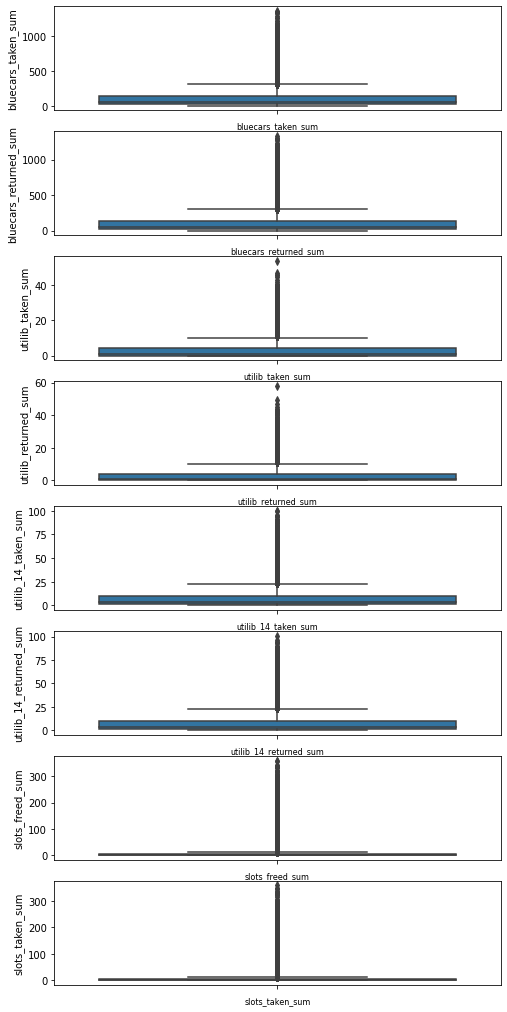

In [52]:
# Checking for outliers

col_names = ['bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(8,18))

for i, col_val in enumerate(col_names):

    sns.boxplot(y= autolib_df[col_val], ax=ax[i])
    #ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

There are outliers on all the selected columns. The outliers should not be dropped because they are valuable values for a conclusive outcome.

In [53]:
# Identifying missing data
print(autolib_df.isnull().sum())

print('There are no missing values in our dataset.')

postal code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64
There are no missing values in our dataset.


#### **Univariate Analysis**

##### a) Central Tendencies

In [54]:
# Finding the mean bluecars taken
print(autolib_df['bluecars_taken_sum'].mean())

print('The average number of blue cars taken is 125 cars')

125.92695057506994
The average number of blue cars taken is 125 cars


In [55]:
# Finding the mean bluecars returned
print(autolib_df['bluecars_returned_sum'].mean())

print('The average number of blue cars returned is 125 cars')

125.912713708424
The average number of blue cars returned is 125 cars


In [56]:
# Finding the mean utilib cars taken
print(autolib_df['utilib_taken_sum'].mean())

print('The average number of utilib cars taken is 3 cars')

3.69829033260802
The average number of utilib cars taken is 3 cars


In [57]:
# Finding the mean utilib cars returned
print(autolib_df['utilib_returned_sum'].mean())

print('The average number of utilib cars returned is 3 cars')

3.6990985390115014
The average number of utilib cars returned is 3 cars


In [58]:
#Finding the mean utilib 1.4 cars taken
print(autolib_df['utilib_14_taken_sum'].mean())

print('The average number of utilib 1.4 cars taken 8 cars')

8.600559527510102
The average number of utilib 1.4 cars taken 8 cars


In [59]:
# Finding the mean utilib 1.4 cars returned
print(autolib_df['utilib_14_returned_sum'].mean())

print('The average number of utilib 1.4 cars returned is 8 cars')

8.599191793596518
The average number of utilib 1.4 cars returned is 8 cars


In [60]:
# Finding the mean of slots freed
print(autolib_df['slots_freed_sum'].mean())

print('The average number of charging slots freed is 22 slots')

22.62903326080199
The average number of charging slots freed is 22 slots


In [61]:
# Finding the mean of slots taken
print(autolib_df['slots_taken_sum'].mean())

print('The average number of charging slots taken is 22 slots')

22.629281939695367
The average number of charging slots taken is 22 slots


In [62]:
# Finding the median

# Finding the median of bluecars taken

print(autolib_df['bluecars_taken_sum'].median())
print('The median number of blue cars taken is 46 cars')

print(" " * 60)
# Finding the median of bluecars returned

print(autolib_df['bluecars_returned_sum'].median())
print('The median number of blue cars returned is 46 cars')

print(" " * 60)
# Finding the median of utilib cars taken

print(autolib_df['utilib_taken_sum'].median())
print('The median number of utilib cars taken is 1 car')

print(" " * 60)
# Finding the median of utilib cars returned

print(autolib_df['utilib_returned_sum'].median())
print('The median number of utilib cars returned is 1 car')

print(" " * 60)
# Finding the median of utilib 1.4 cars taken

print(autolib_df['utilib_14_taken_sum'].median())
print('The median number of utilib 1.4 cars taken 3 cars')

print(" " * 60)
# Finding the median of utilib 1.4 cars taken

print(autolib_df['utilib_14_returned_sum'].median())
print('The median number of utilib 1.4 cars taken is 3 cars')

print(" " * 60)
# Finding the median of slots freed
print(autolib_df['slots_freed_sum'].median())
print('The median number of charging slots freed is 0 slots')

print(" " * 60)
# Finding the median of slots taken
print(autolib_df['slots_taken_sum'].median())
print('The median number of charging slots taken is 0 slots')

46.0
The median number of blue cars taken is 46 cars
                                                            
46.0
The median number of blue cars returned is 46 cars
                                                            
1.0
The median number of utilib cars taken is 1 car
                                                            
1.0
The median number of utilib cars returned is 1 car
                                                            
3.0
The median number of utilib 1.4 cars taken 3 cars
                                                            
3.0
The median number of utilib 1.4 cars taken is 3 cars
                                                            
0.0
The median number of charging slots freed is 0 slots
                                                            
0.0
The median number of charging slots taken is 0 slots


#### b) Dispersion

In [63]:
# Finding the Standard Deviation

# Finding the standard deviation of bluecars taken

print(autolib_df['bluecars_taken_sum'].std())
print('The standard deviation of blue cars taken is 185 cars')

print(" " * 60)
# Finding the standard deviation of bluecars returned

print(autolib_df['bluecars_returned_sum'].std())
print('The standard deviation of blue cars returned is 185 cars')

print(" " * 60)
# Finding the standard deviation of utilib cars taken

print(autolib_df['utilib_taken_sum'].std())
print('The standard deviation of utilib cars taken is 5 cars')
print(" " * 60)

# Finding the standard deviation of utilib cars returned

print(autolib_df['utilib_returned_sum'].std())
print('The standard deviation of utilib cars returned is 5 cars')

print(" " * 60)
# Finding the standard deviation of utilib 1.4 cars taken

print(autolib_df['utilib_14_taken_sum'].std())
print('The standard deviation of utilib 1.4 cars taken is 12 cars')

print(" " * 60)
# Finding the standard deviation of utilib 1.4 cars taken

print(autolib_df['utilib_14_returned_sum'].std())

print('The standard deviation of utilib 1.4 cars taken is 12 cars')

print(" " * 60)
# Finding the standard deviation of slots freed
print(autolib_df['slots_freed_sum'].std())
print('The standard deviation of charging slots freed is 52 slots')

print(" " * 60)
# Finding the standard deviation of slots taken
print(autolib_df['slots_taken_sum'].std())
print('The standard deviation of charging slots taken is 52 slots')

185.42657876727893
The standard deviation of blue cars taken is 185 cars
                                                            
185.50153480148427
The standard deviation of blue cars returned is 185 cars
                                                            
5.815057779367249
The standard deviation of utilib cars taken is 5 cars
                                                            
5.824634228651658
The standard deviation of utilib cars returned is 5 cars
                                                            
12.870098297095637
The standard deviation of utilib 1.4 cars taken is 12 cars
                                                            
12.868992936610336
The standard deviation of utilib 1.4 cars taken is 12 cars
                                                            
52.12026333757879
The standard deviation of charging slots freed is 52 slots
                                                            
52.146029870452566
The standard deviation of

In [64]:
# Finding the variance

# Finding the variance of bluecars taken

print(autolib_df['bluecars_taken_sum'].var())
print('The variance of blue cars taken is 34383')

print(" " * 60)
# Finding the variance of bluecars returned

print(autolib_df['bluecars_returned_sum'].var())
print('The variance of blue cars returned is 34410')

print(" " * 60)
# Finding the variance of utilib cars taken

print(autolib_df['utilib_taken_sum'].var())
print('The variance of utilib cars taken is 33.8')
print(" " * 60)

# Finding the variance of utilib cars returned

print(autolib_df['utilib_returned_sum'].var())
print('The variance of utilib cars returned is 33.9')

print(" " * 60)
# Finding the variance of utilib 1.4 cars taken

print(autolib_df['utilib_14_taken_sum'].var())
print('The variance of utilib 1.4 cars taken is 165')

print(" " * 60)
# Finding the variance of utilib 1.4 cars taken

print(autolib_df['utilib_14_returned_sum'].var())

print('The variance of utilib 1.4 cars taken is 165')

print(" " * 60)
# Finding the variance of slots freed
print(autolib_df['slots_freed_sum'].var())
print('The variance of charging slots freed is 2716')

print(" " * 60)
# Finding the variance of slots taken
print(autolib_df['slots_taken_sum'].var())
print('The variance of charging slots taken is 2719')

34383.01611333789
The variance of blue cars taken is 34383
                                                            
34410.819413706275
The variance of blue cars returned is 34410
                                                            
33.81489697737956
The variance of utilib cars taken is 33.8
                                                            
33.9263638975805
The variance of utilib cars returned is 33.9
                                                            
165.63943017690403
The variance of utilib 1.4 cars taken is 165
                                                            
165.61097920252672
The variance of utilib 1.4 cars taken is 165
                                                            
2716.52185037856
The variance of charging slots freed is 2716
                                                            
2719.2084312501315
The variance of charging slots taken is 2719


In [65]:
# Finding the Skewness 

# Finding the skewness of bluecars taken

print(autolib_df['bluecars_taken_sum'].skew())

print(" " * 60)
# Finding the skewness of bluecars returned

print(autolib_df['bluecars_returned_sum'].skew())

print(" " * 60)
# Finding the skewness of utilib cars taken

print(autolib_df['utilib_taken_sum'].skew())

print(" " * 60)
# Finding the skewness of utilib cars returned

print(autolib_df['utilib_returned_sum'].skew())

print(" " * 60)
# Finding the skewness of utilib 1.4 cars taken

print(autolib_df['utilib_14_taken_sum'].skew())

print(" " * 60)
# Finding the skewness of utilib 1.4 cars taken

print(autolib_df['utilib_14_returned_sum'].skew())

print(" " * 60)
# Finding the skewness of slots freed
print(autolib_df['slots_freed_sum'].skew())

print(" " * 60)
# Finding the skewness of slots taken
print(autolib_df['slots_taken_sum'].skew())

print(" " * 60)
print(" " * 60)
print('Since all the results are positive and greater than 1, all the selected columns are highly positively skewed or skewed right.') 
print('Their right tail of distribution is longer than the left.') 

2.4063548974959086
                                                            
2.412084978838923
                                                            
2.5568719194754777
                                                            
2.57866477971619
                                                            
2.5109244534822923
                                                            
2.511487901149739
                                                            
2.5974057870090994
                                                            
2.5969043474634987
                                                            
                                                            
Since all the results are positive and greater than 1, all the selected columns are highly positively skewed or skewed right.
Their right tail of distribution is longer than the left.


In [66]:
# Finding the Kurtosis

# Finding the kurtosis of bluecars taken

print(autolib_df['bluecars_taken_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of bluecars returned

print(autolib_df['bluecars_returned_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of utilib cars taken

print(autolib_df['utilib_taken_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of utilib cars returned

print(autolib_df['utilib_returned_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of utilib 1.4 cars taken

print(autolib_df['utilib_14_taken_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of utilib 1.4 cars taken

print(autolib_df['utilib_14_returned_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of slots freed
print(autolib_df['slots_freed_sum'].kurt())

print(" " * 60)
# Finding the kurtosis of slots taken
print(autolib_df['slots_taken_sum'].kurt())

print(" " * 60)
print(" " * 60)
print('Since all the results are greater than 3, the data has a heavier tails than the normal distribution.') 
print('It means the selected columns have many outliers.')

6.172692305510042
                                                            
6.1862880957582345
                                                            
7.702361895243428
                                                            
7.93635700780893
                                                            
7.18681525579947
                                                            
7.18546312191963
                                                            
6.454514382612528
                                                            
6.442553073772169
                                                            
                                                            
Since all the results are greater than 3, the data has a heavier tails than the normal distribution.
It means the selected columns have many outliers.


#### Understanding the blue cars returned and the charging slots freed 

Text(0.5, 1.0, 'Frequency of Bluecars Returned')

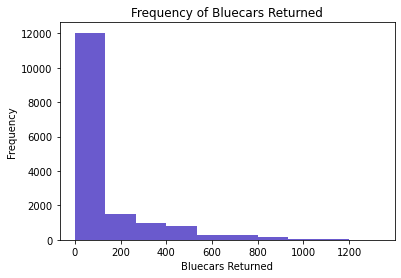

In [67]:
# Frequency of bluecars returned
plt.hist(autolib_df['bluecars_returned_sum'], color = 'slateblue')

plt.xlabel('Bluecars Returned')
plt.ylabel('Frequency')
plt.title('Frequency of Bluecars Returned')



##### 200 cars or less are frequently returned to the stations.

Text(0.5, 1.0, 'Frequency of Charging Slots Freed')

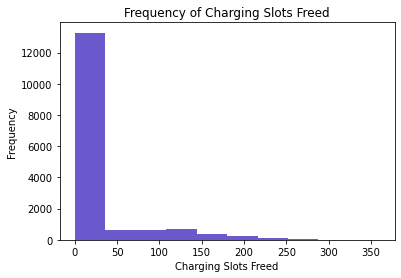

In [68]:
# Freguency of Charging slots freed
plt.hist(autolib_df['slots_freed_sum'], color = 'slateblue')

plt.xlabel('Charging Slots Freed')
plt.ylabel('Frequency')
plt.title('Frequency of Charging Slots Freed')

##### Less than 50 charging slots are frequently freed.

Text(0.5, 1.0, 'Charging Slots by Day of Week')

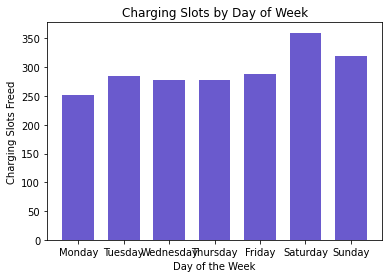

In [69]:
# Charging freed slots according to the days of the week

autolib_df['dayofweek'] = autolib_df['dayofweek'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})
x = autolib_df['dayofweek']
y = autolib_df['slots_freed_sum']

plt.bar(x, y, color = 'slateblue', width=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Charging Slots Freed')
plt.title('Charging Slots by Day of Week')



##### A lot of charging slots are free on Saturday and Sunday as compared to the other days.





Text(0.5, 1.0, 'Bluecars Returned by Day of Week')

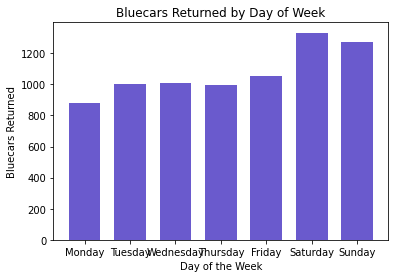

In [70]:
# Bluecars returned according to the days of the week


x = autolib_df['dayofweek']
y = autolib_df['bluecars_returned_sum']

plt.bar(x, y, color = 'slateblue', width=0.7)
plt.xlabel('Day of the Week')
plt.ylabel('Bluecars Returned')
plt.title('Bluecars Returned by Day of Week')

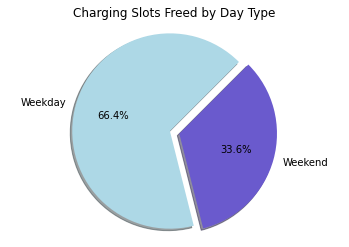

In [71]:
# Charging slots freed by day type

colors = ['lightblue', 'slateblue']
label = ['Weekday', 'Weekend']
explode = (0.1,0)
plt.pie(autolib_df.groupby('day_type')['slots_freed_sum'].sum(),  explode=explode, labels=label, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.title('Charging Slots Freed by Day Type')
plt.show()

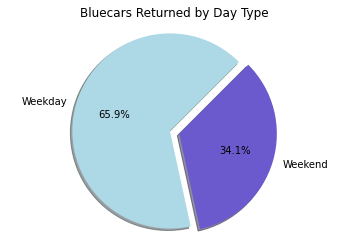

In [72]:
# Bluecars returned by day type

colors = ['lightblue', 'slateblue']
label = ['Weekday', 'Weekend']
explode = (0.1,0)
plt.pie(autolib_df.groupby('day_type')['bluecars_returned_sum'].sum(),  explode=explode, labels=label, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=45)

plt.axis('equal')
plt.title('Bluecars Returned by Day Type')
plt.show()

#### **Bivariate Analysis**

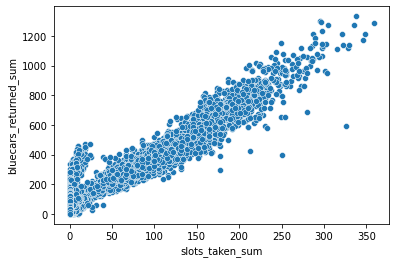

In [73]:
#Plotting a scatter plot between taken recharging slots and Bluecars Returned

sns.scatterplot(x='slots_taken_sum', y='bluecars_returned_sum', data=autolib_df)



###### There is a positive correlation between the recharging slots taken and the bluecars returned. An increase in bluecars returned increases the number of recharging slots taken.

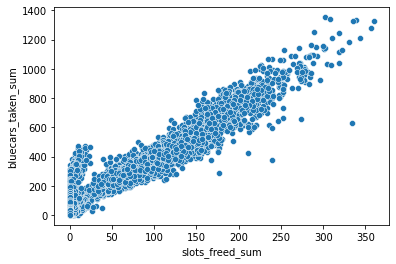

In [74]:
#Plotting a scatter plot between recharging slots freed and Bluecars taken

sns.scatterplot(x='slots_freed_sum', y='bluecars_taken_sum', data=autolib_df)

##### There is a positive correlation between recharging slots freed and the bluecars taken. An increase in bluecars taken increases freed recharging slots

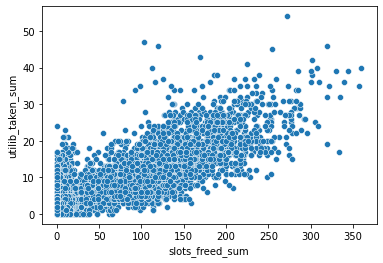

In [75]:
#Plotting a scatter plot between recharging slots freed and utilib taken

sns.scatterplot(x='slots_freed_sum', y='utilib_taken_sum', data=autolib_df)

###### There is a positive correlation between the recharging slots freed and the utilib cars taken. An increase in number of utilib cars taken increases the number of recharging slots freed.

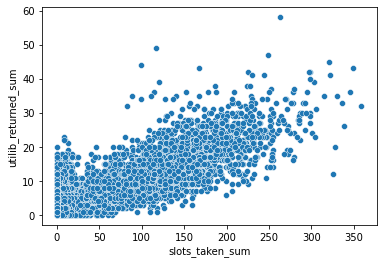

In [76]:
#Plotting a scatter plot between recharging slots taken and Utilib cars Returned

sns.scatterplot(x='slots_taken_sum', y='utilib_returned_sum', data=autolib_df)

###### There is a positive correlation between the recharging slots taken and the utilib cars returned. An increase in the number of utilib cars returned increases the number of recharging slots taken.

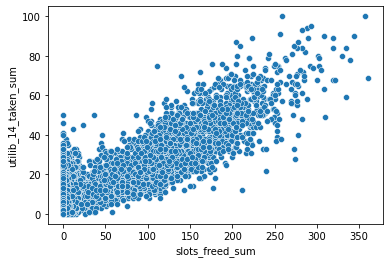

In [77]:
#Plotting a scatter plot between recharging slots freed and Utilib 1.4 cars taken

sns.scatterplot(x='slots_freed_sum', y='utilib_14_taken_sum', data=autolib_df)

###### There is a positive correlation between the recharging slots freed and the utilib 1.4 cars taken. An increase in utilib 1.4 cars taken increases the number of recharging slots freed.

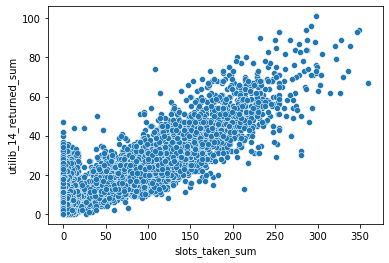

In [78]:
#Plotting a scatter plot between recharging slots taken and Utilib 1.4 cars Returned

sns.scatterplot(x='slots_taken_sum', y='utilib_14_returned_sum', data=autolib_df)

###### There is a positive correlation between the recharging slots taken and the utilib 1.4 cars returned. An increase in utilib 1.4 cars returned increases the number of recharging slots taken.

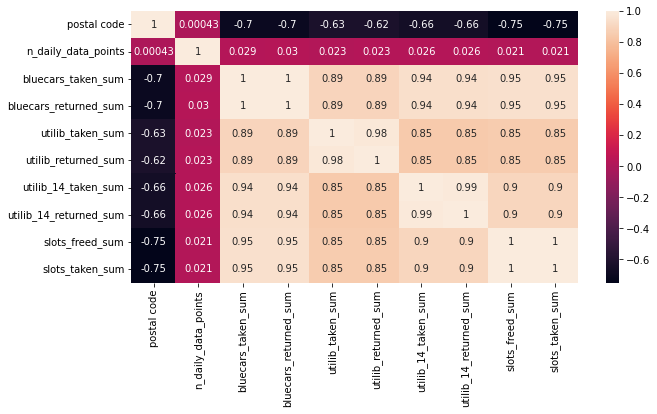

In [79]:
#Ploting a Heatmap
fig, axes = plt.subplots(figsize= [10,5])
sns.heatmap(autolib_df.corr(),annot=True)
plt.show()

There is a strong correlation when correlation value is 1 or close to one.
Values closer to zero means there is no linear trend between the two variables.


### **Hypothesis Testing**


Null Hypothesis: The number of bluecars returned is equal to the number of recharging slots freed on the weekend.

Alternative Hypothesis: The number of bluecars returned is not equal to the number of recharging slots freed on the weekend.

In [80]:
# Defining my Population
population =autolib_df[['day_type', 'bluecars_returned_sum','slots_freed_sum']]
hypothesis_pop = population.loc[population['day_type']=='weekend']
hypothesis_pop.head()

,day_type,bluecars_returned_sum,slots_freed_sum
5,weekend,185,38
6,weekend,180,34
12,weekend,223,38
13,weekend,193,22
19,weekend,217,41


(array([3274.,  432.,  264.,  164.,  185.,  103.,   43.,   46.,   20.,
          10.]),
 array([   0. ,  133.2,  266.4,  399.6,  532.8,  666. ,  799.2,  932.4,
        1065.6, 1198.8, 1332. ]),
 <a list of 10 Patch objects>)

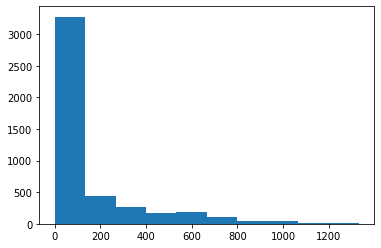

In [81]:
plt.hist(hypothesis_pop['bluecars_returned_sum'])

To get greater accuracy, t-test will be used and therefore, we will select a small sample size of 20.

In [85]:
#Choosing your sample size
import random
sample_returned = hypothesis_pop['bluecars_returned_sum'].sample(n = 20,random_state=1)
sample_slots_freed = hypothesis_pop['slots_freed_sum'].sample(n = 20,random_state=1)

In [86]:
#Calculating the p-value, t-test 
statistic, pvalue = ttest_ind(sample_returned, sample_slots_freed, equal_var=True)

# Printing out the p-value and the statistic

print("p-value of the test = ",pvalue)
print("Statistic = ",statistic)
print("_" * 50)
if pvalue < 0.05:
  print("The number of bluecars returned is not equal to the number recharging slots freed on the weekend.")
  print("The p_value is too low: ",pvalue)
else:
  print("The number of bluecars returned is equal to the number of recharging slots freed on the weekend.")
print("_" * 40)


# Means of the two samples
print(sample_returned.mean())
print(sample_slots_freed.mean())

p-value of the test =  0.026769979911133234
Statistic =  2.30422715245806
__________________________________________________
The number of bluecars returned is not equal to the number recharging slots freed on the weekend.
The p_value is too low:  0.026769979911133234
________________________________________
124.65
24.05


##### ***Conclusion***
##### P-value(0.03) is less than the significance level(0.05). Therefore, we will reject the null hypothesis. 

##### Thus, the number of bluecars returned is not equal to the number of freed recharging slots.

##### ***Recommendation***
##### Autolib company should ensure there are enough recharging slots to charge the returned bluecars in the appropriate time/duration to ensure the business runs smoothly.
